# K-Means Clustering Algorithm In Python  


## K-Means Algorithm Background  

The K-Means algorithm seeks to separate objects into groups (or clusters), such that the objects within any given cluster are more similar to each other than they are to other objects in other groups. For example, we could cluster students by their course grades, NFL players by their performance, flowers by their petal and stem length, or as we will explore in this notebook, types of cancer based on the profiles of genes that are active.  

This algorithm studies cluster analysis of input data defined by an array of numerical attributes (values). So a students' course grades array would have the grades for each course they have taken. An NFL players' array would contain thier performance rating for each game played. For flowers, thier array would contain petal and stem lengths. And for the example dataset that we'll actually use here, each patient will be characterized by an array of gene expression levels, indicating for each gene a kind of relative abundance for that patient.  

The goal is to take in a set of samples and find common ground, specifically 'k' of them. (Hence 'K' Means).


## How The K-Means Algorithm Is Implemented  

The First step to implement the K-Means algorithm is to create a list of clusters, and go through the samples in the data set, assigning each sample to a random cluster. Once all samples have been assigned to a cluster, we need to represent each cluster by a centroid.  

The following is how to calculate each cluster's centroid: the _jth_ value in the centroid is the mean (average) of the _jth_ of all the members in the cluster.   

Once we have found each cluster's centroid, we now need to find each sample's nearest centroid. This will move some (or all) of the centroids members to another cluster that better represents the member. For the program in this notebook, this will be done using **Euclidean Distance:**  

$$ d(p,q)=d(q,p)=\sqrt{(q_1-p_1)^{2}+(q_2-p_2)^{2}+...+(q_n-p_n)^{2}}=\sqrt{\sum_{i=1}^{n}(q_i-p_i)^{2}}$$  

Where $p$ and $q$ are vectors of equal length.  

What the **Euclidean Distance** computes is the sqaure root of sum of the difference between the centroid and the members _jth_ value squared. This returns a single value, which is the "distance" from the member to a given centroid. This calculation is used to determine which cluster is "closest" to the given member.  

The K-Means algorithm will go through each cluster's members, calculate the member's distance form each cluster centroid, and determine if the member needs to be moved. Once all members that required movement are moved, the algortihm recalculates each clusters centroid, and repeats the process of calculating distance and moving members untill no members are moved. This process is complete when no cluster members are moved, or when a preset number of maximum iterations is reached.

Once the movement process is complete, the program will use a heatmap to display the results, so one can see a visual of the reclustered data to determine if there are _k_ distinct groups within the data.  

## The K-Means Algorithm Code  

Now that I have given some background information about how the K-Means algorithm is used and how it is implemented, lets take a look at some working K-Means code.  

Since this algorthim is coded using classes that rely on eachother, I will break the program down method by method, then provide some output for each method, and at the end will show the end result of the program being ran with cancer.csv.  

## Cluster Class Used In K-Means

```python
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import*
import random

class clusters(K_means):
    def __init__(self):
        self.members = []                                                      # Create empty member array 
        self.centroid = None                                                   # Create centroid attribute
        self.distance = None 
```

The first thing you will notice is we need to import numpy, pandas, matplotlib, math, and random modules in order for this code to work.  

You will also notice that the cluster class is a child of the K_means class, which we will build after this class is complete.

The first portion of code, `__init__(self)`, is the constructor for the cluster class. It creates attribute `self.members,` an array to hold the memebers within the cluster. It also creates attribue `self.centroid,` which will be the centroid for the cluster.  

Now that we have the constructor for the cluster class, we will add a method to add samples to the `self.members` array.

```python 
    def append_data(self,sample):                    
        self.sample = sample                          # Attribute sample                                                
        self.members.append(self.sample)              # Append sample to members array
```

The `append_data(self,sample)` method takes a sample as an arguement, and will append it to `self.members` array, using the built in `append` method.  

The last thing we need to add to the cluster class is a method to remove data from the `self.members` array.

```python  
    def remove_data(self,index):
        self.index = index                              # Attribute index
        self.members.remove(self.index)                 # Remove index from member array  
```

The `remove_data` method takes an index as an argument, which is the index within the `self.members` list to be removed, using the built in `remove` method.



## The K_means Class

```python
class K_means:
    def __init__(self,k, dataSet):
        self.k = k               
        self.cluster_set = []                     # create an empty clutser array     
        self.dataSet = pd.read_csv(dataSet, index_col = 0, header = None)
        for i in range(k):                        # Loop k number of times
            cluster = clusters()                  # make a cluster object
            self.cluster_set.append(cluster)      # Append cluster object to cluster_set array
```

The first portion of code in the `K_means` class is the `__init__(self,k,dataSet)` which is the constructor for the `K_means` class. The constructor takes on arugments of  `k`, and `dataSet`. `self.k` is the number of clusters to create, and `self.dataSet` is the data set in which we are going to perform the K_Means algorithm on. At this point, the `K_means` class has attributes `self.k`, the number of clusters, `self.cluster_set`,an array of each cluster and its members,`self,dataSet`, the dataSet put into a pandas DataFrame. The constructor then loops _k_ number of times and creates an empty cluster member list and appends it to the `self.cluster_set`. This creates our empty clusters.  

Now we need to add a method to put samples into each cluster.

```python    
    def random_data(self):
        dataSet1 = self.dataSet                            # Alias DataSet   
        for i in range(self.k):                            # Loop k number of times
            data_subset = dataSet1.sample()                # Get a sample from the data set alias
            index = list(data_subset.index)                # Put sample in a list
            df_subset1 = list(dataSet1.loc[index[0]])      # Get the numerical value of the sample
            self.cluster_set[i].append_data(df_subset1)    # append it to cluster "i" (ensures no empty cluster)
            dataSet1 = dataSet1.drop(data_subset.index)    # remove sample from data set alias so no repeats happen     
        for i in range(len(dataSet1)):                                 # Now go through remaming samples
            e = random.randint(0,self.k-1)                             # Pick a random cluster 
            self.cluster_set[e].append_data(list(dataSet1.iloc[i]))    # Put sample data into appropriate cluster
```

The method `random_data` method creats an alias dataFrame called `dataSet1`, and loops _k_ number of times, adding a random sample to each of the clusters, to ensure that there is no cluster that will be empty. The method deletes these samples, to ensure that no samples are added twice. Then the method goes through the rest of the samples iteratively, and adds each sample to a randomly selected cluster. The method completes ones all samples have been assigned to a cluster.  

Now that we have members in our clusters, we now need to add a method that will calculate each cluster's centroid.

```python   
    def calculate_centroid(self):
        '''This function calculates the centroid for each cluster
        Returns: centroid list'''
        self.centroids = []                                     # Create empty centroid list 
        for i in self.cluster_set:                              # Loop through each cluster
            centroid = pd.DataFrame(i.members).mean()           # Centroid attributes are the average of each cluster's
                                                                # Attributes
            i.centroid = centroid                               # Declare centroid attribute for each cluster
            self.centroids.append(i.centroid)                   # Append centroid to centroid list  
        return self.centroids  
```

The method `calculate_centroid` creates an attribute `self.centroid`, an array of centroids. The method loops through each cluster set, and averages the features of the cluster, and adds the result to the centroid attribute created in our cluster class. Now each cluster has a `centroid` attribute we can call on.  

Now that we have calculated the centroids for each cluster, we need to add a method that calculates the Euclidean distance for each sample. 

```python   
    def distances(self,cluster):
        self.distance = []                                    # Array of distances
        for i in range(len(self.cluster_set)):                # Loop through each cluster 
            difference =(self.centroids[i] - cluster)**2      # Calculate the distance from centroid to cluster samples 
            Euclidean = sqrt(sum(difference))                 # take swaure root of difference 
            self.distance.append(Euclidean)                   # Append the difference to difference list
        return self.distance
```

The `distances(self,cluster)` method takes on a `cluster` as an argument, and creates an attribute `self.distance`, an array of a samples' distances from each centroid. The method loops through each cluster, and calculates the samples distance from the clusters centroid. The method then appends the each distance to the `self.distance` array.  

Now that we have a distance method, we need to add a method to re-cluster our samples.

```python    
    def shift(self):
        after = []                                                             # Array to compare before/after shift 
        Flag = True
        while(Flag == True):
            before = self.get_members()                                        # Create an object of before members
            for i in range(len(self.cluster_set)):                             # Loop through each cluster 
                for e in self.cluster_set[i].members:                          # Loop through each cluster's members 
                    distance_array = self.distances(e)                         # Create an array of w/ distance function
                    closest_index = distance_array.index(min(distance_array))  # Calculate which cluster is the closest
                    if closest_index != i:                                     # Move the sample if it needs to be moved 
                        self.cluster_set[closest_index].append_data(e)         # Move the sample to the new cluster   
                        self.cluster_set[i].remove_data(e)                     # Remove sample from current cluster 
            self.calculate_centroid()                                          # Recalculate centroid
            after = self.get_members()                                         # After array for current cluster members 
            if after == before:                                                # Check to see if clusters changed 
                Flag = False
            else:
                Flag = True
```

The `shift(slef)` method creates an empty array called `after` to house the samples after they have been moved. The method declares a boolean flag of `False`, and creates an `before` array, housing each clusters' members before any member reassignment happens. The method then loops through each cluster, calculates each clusters' members' distance from each centroid, and determines if the member needs to be moved. If the member needs to move, it moves the member, and removes the member from its current cluster. Once all members that need to be moved across all clusters have been moved, the method recalculates each clusters' new centroid. The method then checks to determine if any cluster members have moved. If there is a cluster member that has moved, the method will continue to reassign members until no members have been moved, in which it will stop.

Now that we have a method that will reassign clusters until no cluster member has moved, we will add a method grab all of the members before and after they have been moved.

```python
def get_members(self):
        final_membs = []
        for i in self.cluster_set:                                             # Go through cluster set
            final_membs.extend(i.members)                                      # Put all the members in an array
        return final_membs
```

The `get_members(self)` method will get all of the members in our clusters and put them in a list to compare them to the pre and post shift members. This helps us determine if the shifting has stopped.

Now that we have a method to help us determine if shifting has stopped, we need a method to plot our final result.

```python    
    def plot(self):
        data_array = []                            # Creats an empty array to hold the data to be plotted in a heatmap
        for i in self.cluster_set:                 # Loop through each cluster
            data_array.extend(i.members)           # Extend each cluster's members' to the data array   
        graph = plt.subplot()                      # Create a graph 
        plt.pcolor(data_array, cmap = 'seismic')   # Plot the data array, with color 'seismic' 
        graph.axes.get_xaxis().set_visible(False)  # Format the x axis
        graph.axes.get_yaxis().set_visible(False)  # Format y axis
        plt.colorbar()
        length = 0
        for i in self.cluster_set:
            length += len(i.members)
            if length != len(self.dataSet):
                plt.axhline(y = length, c = 'black', lw = 3.0)   # Put lines on heatmap
        plt.show()
```

The `plot(self)` method creates an `data_array` to house each clusters' member for plotting. The method loops through each cluster, and extends the clusters' members to the `data_array`. The method then formats the plot, and calculates where to put lines on the heatmap. The method does this by declaring variable `length` as 0, then stepping through each cluster, determining how many members are in the cluster, and adding the length of the cluster to the length variable. It does this until the length varibale is equal to the length of the `dataSet`.  

Now that we have the a method to plot our results, I added a function to gain insight on our ouput. This function is not necessary for the K_Means algorithm, but I found it useful to add insight to the cancer dataset we an analyzing.  



 ```python   
    def insight(self):
        insights = []                                        # Empty array
        count = 0
        insight_frame = self.dataSet                         # Create dataFrame for original data set
        insight_frame = insight_frame.sort_index()           # sort the insight frame by col index (recur and non recur)
        patient_type = insight_frame.index                   # Create list of sorted patient type
        for i in range(len(patient_type)):                   # loop through patient list
            if 'non' in patient_type[i]:                     # Count number of non recurring patients
                count += 1
        nons = pd.DataFrame(insight_frame.iloc[0:count])     # Create data frame of non recurring samples  
        has = pd.DataFrame(insight_frame.iloc[count:])          # Create data frame of recurring samples   
        for i in self.cluster_set:                              # Loop through the clusters, and their samples 
            count_non = 0
            count_recur = 0
            for e in range(len(i.members)):   
                cluster_df = pd.DataFrame(i.members)            # Create a dataframe of the cluster samples
                mem_list = cluster_df.iloc[e].tolist()          # create list of the members
                num_nons = nons.eq(mem_list,axis = 1).all(1)    # Find in nons
                num_recur = has.eq(mem_list,axis = 1).all(1)    # Find in recurs
                count_non += sum(num_nons)                      # Add the nons
                count_recur += sum(num_recur)                   # Add the recurs
                counts = (count_non,count_recur)                # Put totals in tuple
            insights.append(counts)                             # Append tuple to insight array
        return insights                                         # Return insight array 
```
        

The method `insight(self)` provides a way to look at each cluster and determine how many samples in that cluster have been labled as _non-recurring_ or _recurring._ The method creats an empty array, `insights`, to hold the data of non-recurring or recurring for each sample. It then creates a pandas data frame of the original dataSet, sorts it by index, and creates a list `patient_type` that is the list of non-recurring and recurring entries for the data column index. The method then goes through the `patient_type` list and counts the number of non-reucrring entries in the origial dataset, and returns a data frame with all of the non-recurring samples. It also creates a data frame of all the recurring samples. The method then goes through each cluster and its members, and counts the number of recurring and non-recurring members by comparing each cluster member to the recurring and non-recurring data frame. It then returns a nested list containing each clusters number of recurring and non-recurring members. This is used to provide insight on the sample data. 

Now that each class and the methods for each class have been defined, we will put the code together.

**Note: Read the code outputs below before running the code yourself.**

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import*
import random

class K_means:
    '''A class used to create a k means object, with methods to run the k-means
        algorithm.
        def __init__(self,k): k-means constructor that produces k clusters
        def random_data(self,dataSet): method that creates random clusters
        def calculate_centroid(self): method to produce centroid for each cluster
        def distances(self,cluster): calculates each smaples distance from eahc cluster
        def shift(self): reassigns cluster members to closest cluster by centroid distance
        def get_members(self): gathers each clusters members
        '''
    def __init__(self,k, dataSet):
        ''' connstructor that creates k number of clusters
        Parameter k: number of clusters to produce'''
        self.k = k               
        self.cluster_set = []                     # create an empty clutser array
        self.df1 = None       
        self.dataSet = pd.read_csv(dataSet, index_col = 0, header = None)
        for i in range(k):                        # Loop k number of times
            cluster = clusters()                  # make a cluster object
            self.cluster_set.append(cluster)      # Append cluster object to cluster_set array    
            
            
    def random_data(self):
        '''Method that assigns each sample to a random cluster '''
        dataSet1 = self.dataSet                                                 # Alias DataSet   
        for i in range(self.k):                                                 # Loop k number of times
            data_subset = dataSet1.sample()                                     # Get a sample from the data set alias
            index = list(data_subset.index)                                     # Put sample in a list
            df_subset1 = list(dataSet1.loc[index[0]])                           # Get the numerical value of the sample
            self.cluster_set[i].append_data(df_subset1)                         # append it to cluster "i" (this ensure each cluster will not be empty)
            dataSet1 = dataSet1.drop(data_subset.index)                         # remove sample from data set alias so no repeats happen    
            
        for i in range(len(dataSet1)):                                          # Now go through remaming samples
            e = random.randint(0,self.k-1)                                      # Pick a random cluster 
            self.cluster_set[e].append_data(list(dataSet1.iloc[i]))             # Put sample data into appropriate cluster 
           
        
    def calculate_centroid(self):
        '''This function calculates the centroid for each cluster
        Returns: centroid list'''
        self.centroids = []                                                    # Create empty centroid list 
        for i in self.cluster_set:                                             # Loop through each cluster
            centroid = pd.DataFrame(i.members).mean()                          # Centroid's attribute value is the average of each cluster's attributes
            i.centroid = centroid                                              # Declare centroid attribute for each cluster
            self.centroids.append(i.centroid)                                  # Append centroid to centroid list  
                                                      # Return the centroid
        
    
    def distances(self,cluster):
        ''' This function calculates each samples distance from the given cluster
        Parameter cluster: The cluster to calculate the distance from '''
        self.distance = []                                                     # Array of distances
        for i in range(len(self.cluster_set)):                                 # Loop through each cluster 
            difference =(self.centroids[i] - cluster)**2                       # Calculate the distance from centroid to cluster samples 
            Euclidean = sqrt(sum(difference))                                  # take swaure root of difference 
            self.distance.append(Euclidean)                                    # Append the difference to difference list
        return self.distance                                                   # Return the distance array 
    
    
    
    def shift(self):
        '''This function will calculate the distance of each sample to each cluster's
        centroid,and move the sample into the cluster in which it is closest to'''
        after = []                                                             # Array to compare before shift and after shit 
        Flag = True
        while(Flag == True):
            before = self.get_members()                                        # Create an object in which to campe before/after shift members
            for i in range(len(self.cluster_set)):                             # Loop through each cluster 
                for e in self.cluster_set[i].members:                          # Loop through each cluster's members 
                    distance_array = self.distances(e)                         # Create an array of distances through distance function
                    closest_index = distance_array.index(min(distance_array))  # Calculate which cluster is the closest
                    if closest_index != i:                                     # Move the sample if it needs to be moved 
                        self.cluster_set[closest_index].append_data(e)         # move the sample to the appropriate cluster   
                        self.cluster_set[i].remove_data(e)                     # remove sample from current cluster, after it has been moved 
            self.calculate_centroid()                                          # After all necessary moves, recalculate centroids based on new cluster sets
            after = self.get_members()                                         # After array now hold the current cluster members 
            if after == before:                                                # Check to see if clusters changed 
                Flag = False
            else:
                Flag = True
                
    def get_members(self):
        '''This function appends gets each clusters members
        Returns: array of members for each cluster'''
        final_membs = []
        for i in self.cluster_set:                                             # Go through cluster set
            final_membs.extend(i.members)                                      # Put all the members in an array
        return final_membs
            
        
    def plot(self):
        '''This method will plot the end K-means data after shfting is complete
        in the for of a heatmap.'''
        data_array = []                                                        # Creats an empty array to hold the data to be plotted in a heatmap
        for i in self.cluster_set:                                             # Loop through each cluster
            data_array.extend(i.members)                                       # Extend each cluster's members' to the data array   
        graph = plt.subplot()                                                  # Create a graph 
        plt.pcolor(data_array, cmap = 'seismic')                               # Plot the data array, with color 'seismic' 
        graph.axes.get_xaxis().set_visible(False)                              # Format the x axis
        graph.axes.get_yaxis().set_visible(False)                              # Format y axis
        plt.colorbar()
        length = 0
        for i in self.cluster_set:
            length += len(i.members)
            if length != len(self.dataSet):
                plt.axhline(y = length, c = 'forestgreen', lw = 3.0)                 # Put lines on the heatmap
        plt.show()
    
    def insight(self):
        '''This function determines how many nonrecurring and recurring samples
        are in each cluster after re assignment convergence
        Returns: a touple for each cluster, representing number of non recurring
        samples for index 0, and recurring in index 1'''
        insights = []                                                            # Empty array
        count = 0
        insight_frame = self.dataSet                                             # Create dataFrame for original data set
        insight_frame = insight_frame.sort_index()                               # sort the insight frame by col index (sorts by recur and non recur)
        patient_type = insight_frame.index                                       # Create list of sorted patient type
        for i in range(len(patient_type)):                                       # loop through patient list
            if 'non' in patient_type[i]:                                         # Count number of non recurring patients
                count += 1
        nons = pd.DataFrame(insight_frame.iloc[0:count])                         # Create data frame of non recurring samples  
        has = pd.DataFrame(insight_frame.iloc[count:])                           # Create data frame of recurring samples   
        for i in self.cluster_set:                                               # Loop through the clusters, and their samples 
            count_non = 0
            count_recur = 0
            for e in range(len(i.members)):   
                cluster_df = pd.DataFrame(i.members)                            # Create a dataframe of the cluster samples
                mem_list = cluster_df.iloc[e].tolist()                          # create list of the members
                num_nons = nons.eq(mem_list,axis = 1).all(1)                    # Find in nons
                num_recur = has.eq(mem_list,axis = 1).all(1)                    # Find in recurs
                count_non += sum(num_nons)                                      # Add the nons
                count_recur += sum(num_recur)                                   # Add the recurs
                counts = (count_non,count_recur)                                # Put totals in tuple
            insights.append(counts)                                             # Append tuple to insight array
        return insights                                                         # Return insight array 
        
        
class clusters(K_means):
    ''' A class that cretes clusters to be stored in K-means members cluster array
    This class is a child of the K-means class
    def __init__(self): creats an empty member array, and gives each cluster a centroid attribute
    def append_data__(self,sample): method to append data to the member array
    def remove_data(self,sample): method to remove data from the member array'''
    def __init__(self):
        ''' Constructor for the clusters class'''
        self.members = []                                                      # Create empty member array 
        self.centroid = None                                                   # Create centroid attribute
        self.distance = None 
        
    def append_data(self,sample):
        '''This method allows one to append data to the member array
        Parameter sample: the data to append to member array'''
        self.sample = sample
        self.members.append(self.sample)
        
    def remove_data(self,index):
        '''This method allows one to remove data from the member array 
        Parameter index: the index in which to remove from the member array'''
        self.index = index 
        self.members.remove(self.index)

### Running The Code  

Now That we have put the code together, we should run it!  


We will begin by using a small data set `simple.csv` and see how the program performs.

In [15]:
test_run = K_means(3, 'simple.csv')

The output is an K_means object:

In [16]:
test_run

Now we will create the clusters by calling `test_run.random_data()`:

In [17]:
test_run.random_data()

There should be 3 clusters now. I will check this by calling `test_run.cluster_set`:

In [18]:
test_run.cluster_set

We can also see what members each cluster has by calling `test_run.cluster_set[i].members`

In [19]:
test_run.cluster_set[0].members

[[0.0, 0.1, 0.2, 0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 [0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]

In [20]:
test_run.cluster_set[1].members

[[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]]

In [21]:
test_run.cluster_set[2].members

[[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0],
 [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.0, 0.1],
 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]

Now we will calculate the centroids by calling `test_run.calculate_centroid()`.

In [22]:
test_run.calculate_centroid()

We can now check to make sure we have centroids by calling `test_run.centroids'.

In [23]:
test_run.centroids

[0    0.25
 1    0.05
 2    0.35
 3    0.25
 4    0.45
 5    0.50
 6    0.55
 7    0.60
 8    0.65
 9    0.70
 dtype: float64, 0    0.4
 1    0.4
 2    0.4
 3    0.4
 4    0.4
 5    0.4
 6    0.4
 7    0.4
 8    0.4
 9    0.4
 dtype: float64, 0    0.666667
 1    0.633333
 2    0.600000
 3    0.566667
 4    0.533333
 5    0.500000
 6    0.466667
 7    0.433333
 8    0.333333
 9    0.366667
 dtype: float64]

Now that we have centroids, we will re-cluster the data by calling `test_run.shift()`:

In [24]:
test_run.shift()

Now that the algorithm is done running, we can plot the output buy calling `test_run.plot()`:

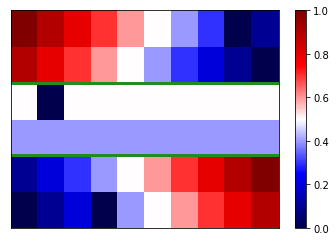

In [25]:
test_run.plot()

**Note: This heatmap will produce slighty different results form run to run. Run the code multiple times to determine if there is a similar pattern. The discussion was formed from the following heatmap.**

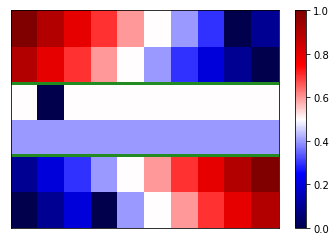

As we can see, there are 3 clusters (seperated by green line), and each cluster seems to have a distinct pattern. It looks like the algorithm correctly ran, so lets test it on the bigger data set, `cancer.csv`.

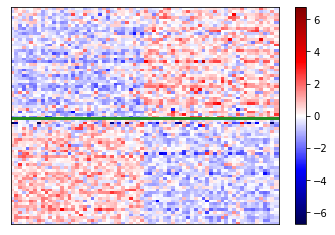

[(33, 5), (11, 29)]

In [26]:
cancer_run = K_means(2,'cancer.csv')
cancer_run.random_data()
cancer_run.calculate_centroid()
cancer_run.shift()
cancer_run.plot()
cancer_run.insight()

## Conclusion Of Clustering Cancer.csv  

**Note: This conclusion was based on the following cluster heatmap. The description may not match your running of the code as the output of the algorithm will differ from run to run.**

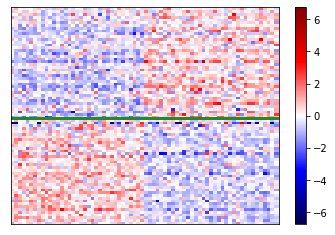 <center> **Insight output: [(33, 5), (11, 29)]**</center>

We can see after running the bigger data set through the K_means algorithm, that there are two distinct groups of patients. Furthermore, with the output of the `insight` method, we can determine that the first cluster (bottom on the heatmap), has more non-recurring cases of cancer, and the opposite is true for the other cluster. With this information, we can conclude that those who have non recurring cancer have more of of roughly the first half of the genes (the 'red' genes) and less of the second half ('blue' genes). The opposite is true for the second cluster. 

## Conclusion  

There are strengths and weaknesses of the K-Means clustering algorithm:  

Weaknesses:  

* The number of clusters, k, needs to be determined beforehand.
* The output may not always be the same.
* The algorithm is easily affected by outliers.  

Strengths:
* K-Means is typically faster than hierarchical clustering, if we keep k small. 
* Relatively easy to implement.
* Will generally produce tighter clusters than hierarchical clustering. 
